[View in Colaboratory](https://colab.research.google.com/github/LuizFelipeLemon/machine_learning/blob/master/linear_regression.ipynb)

In [82]:
import os
import tarfile
from six.moves import urllib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados
#!cat dados/Salary_Data.csv


Salary_Data.csv


In [83]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()
print(salary_data)

#salary_data.head()


    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [84]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [0]:

random = salary_data.sample(frac=1)

years = random.YearsExperience
years

years_train = years[:-15]
#print(years_train)
years_test = years[15:]
#print(years_test)

salary = random.Salary
#print(years)

salary_train = salary[:-15]
#print(salary_train)
salary_test = salary[15:]
#print(salary_test)



In [86]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(years_train.reshape(-1,1), salary_train.reshape(-1,1))

salary_pred = regr.predict(years_test.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [87]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(salary_test.reshape(-1,1), salary_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(salary_test.reshape(-1,1), salary_pred))

Coefficients: 
 [[9514.14423048]]
Mean squared error: 33968010.17
Variance score: 0.94


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


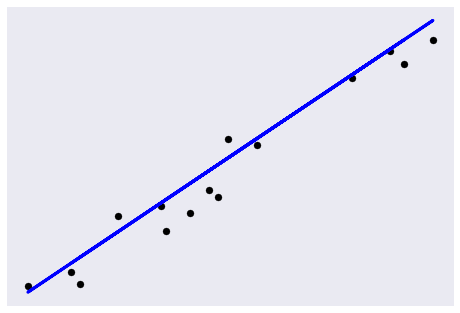

In [89]:
# Plot outputs
plt.scatter(years_test.reshape(-1,1), salary_test.reshape(-1,1),  color='black')
plt.plot(years_test.reshape(-1,1), salary_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()